# Análise e Previsão da Evolução da COVID-19 no Brasil
Analise de séries temporais sobre a contaminação do vírus COVID-19 pelo mundo.

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#importação do arquivo
from google.colab import files
arq = files.upload()

Saving countries-aggregated.csv to countries-aggregated (1).csv


In [3]:
#Preparação do Dataframe
df = pd.read_csv("countries-aggregated.csv", parse_dates=['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


### Entendendo o dataset

In [4]:
#Tipos de dados
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [5]:
#Tamanho do dataset
df.shape

(161568, 5)

In [6]:
#Verificando se temos dados faltantes
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

### Análises iniciais

Criando dataframe de informações do Brasil

In [8]:
df.loc[df.Country == 'Brazil']

,Date,Country,Confirmed,Recovered,Deaths
19584,2020-01-22,Brazil,0,0,0
19585,2020-01-23,Brazil,0,0,0
19586,2020-01-24,Brazil,0,0,0
19587,2020-01-25,Brazil,0,0,0
19588,2020-01-26,Brazil,0,0,0
...,...,...,...,...,...
20395,2022-04-12,Brazil,30184286,0,661741
20396,2022-04-13,Brazil,30210934,0,661904
20397,2022-04-14,Brazil,30234024,0,662043
20398,2022-04-15,Brazil,30247302,0,662154


Casos confirmados

In [9]:
#Dataframe Brasil
brasil = df.loc[(df.Country == 'Brazil') & (df.Confirmed > 0)]

In [10]:
#Gráfico de casos confirmados
px.line(brasil, 'Date', 'Confirmed', 
        labels={'Date':'Data', 'Confirmed':'Número de casos confirmados'},
       title='Casos confirmados no Brasil')

Número de novos casos por dia

In [11]:
#Implementando uma função para fazer a contagem de novos casos
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['Confirmed'].iloc[x] - brasil['Confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
# Visualizando
px.line(brasil, x='Date', y='novoscasos', title='Novos casos por dia',
       labels={'Date': 'Data', 'novoscasos': 'Novos casos'})

Número de mortes

In [13]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.Date, y=brasil.Deaths, name='Mortes', mode='lines+markers',
              line=dict(color='red'))
)
#Edita o layout
fig.update_layout(title='Mortes por COVID-19 no Brasil',
                   xaxis_title='Data',
                   yaxis_title='Número de mortes')
fig.show()

Taxa de crescimento COVID-19

In [14]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    # Se data_inicio for None, define como a primeira data disponível no dataset
    if data_inicio == None:
        data_inicio = data.Date.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.Date.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    # Define os valores de presente e passado
    passado = data.loc[data.Date == data_inicio, variable].values[0]
    presente = data.loc[data.Date == data_fim, variable].values[0]
    
    # Define o número de pontos no tempo q vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Calcula a taxa
    taxa = (presente/passado)**(1/n) - 1

    return taxa*100

In [15]:
cresc_medio = taxa_crescimento(brasil, 'Confirmed')
print(f"O crescimento médio do COVID no Brasil no período avaliado foi de {cresc_medio.round(2)}%.")

O crescimento médio do COVID no Brasil no período avaliado foi de 2.23%.


**Taxa de crescimento no tempo**

Para isso, vamos definir uma função para calcular a taxa de crescimento diária.




In [16]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = data.Date.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.Date.max()
    n = (data_fim - data_inicio).days
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas)*100

In [17]:
tx_dia = taxa_crescimento_diaria(brasil, 'Confirmed')
tx_dia

array([ 0.00000000e+00,  0.00000000e+00,  1.00000000e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+02,  0.00000000e+00,
        2.25000000e+02,  0.00000000e+00,  5.38461538e+01,  2.50000000e+01,
        2.40000000e+01,  2.25806452e+01,  3.68421053e+01,  1.90384615e+02,
        0.00000000e+00,  7.28476821e+00,  2.34567901e+01,  6.05000000e+01,
        1.58878505e+01,  6.69354839e+01,  2.76972625e+01,  2.87515763e+01,
        5.14201763e+01,  2.44501940e+01,  1.67879418e+01,  1.36626613e+01,
        1.68754894e+01,  1.44723618e+01,  1.42522681e+01,  9.01639344e+00,
        7.58928571e+00,  2.48525879e+01,  1.95732027e+01,  1.76711527e+01,
        1.25808056e+01,  1.43992933e+01,  7.43243243e+00,  9.26325247e+00,
        1.54016939e+01,  1.52201796e+01,  1.18862090e+01,  8.54521335e+00,
        5.54537122e+00,  7.06807546e+00,  5.57858688e+00,  7.81903542e+00,
        1.21051382e+01,  7.43290960e+00,  1.07050123e+01,  8.83557983e+00,
        5.44492335e+00,  

In [18]:
#Gráfico linear 
primeiro_dia = brasil.Date.loc[brasil.Confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, brasil.Date.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil',
       labels={'y':'Taxa de crescimento', 'x':'Data'})

###Modelos de predições

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

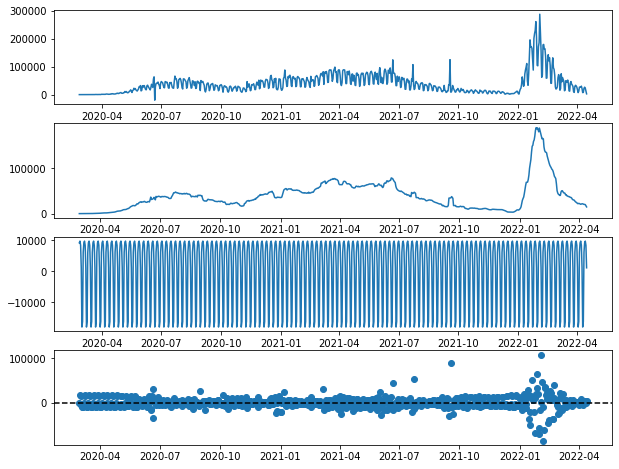

In [25]:
novoscasos = brasil.novoscasos
novoscasos.index = brasil.Date

res = seasonal_decompose(novoscasos)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(novoscasos.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

Decompondo a série de Casos confirmados

In [26]:
confirmados = brasil.Confirmed
confirmados.index = brasil.Date

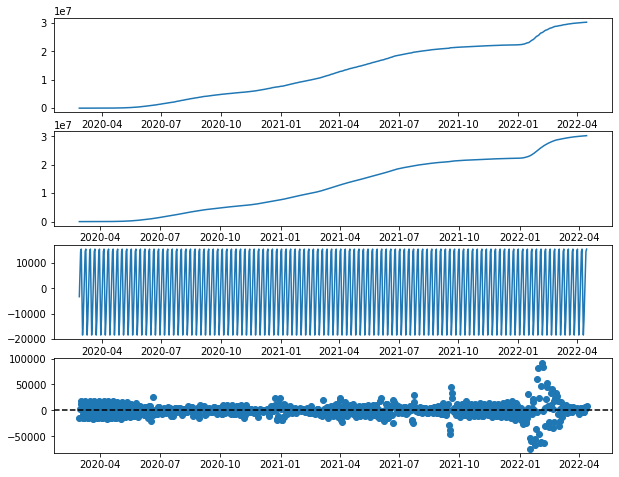

In [27]:
res2 = seasonal_decompose(confirmados)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res2.observed)
ax2.plot(res2.trend)
ax3.plot(res2.seasonal)
ax4.scatter(confirmados.index, res2.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

Predição de números confirmados com AUTO-ARIMA

In [19]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from pmdarima.arima import auto_arima

In [29]:
modelo = auto_arima(confirmados)

In [30]:
pd.date_range('2022-04-17', '2022-05-17')

DatetimeIndex(['2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02',
               '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06',
               '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14',
               '2022-05-15', '2022-05-16', '2022-05-17'],
              dtype='datetime64[ns]', freq='D')

In [34]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observed'
))

fig.add_trace(go.Scatter(x=confirmados.index, y = modelo.predict_in_sample(), name='Predicted'))

fig.add_trace(go.Scatter(x=pd.date_range('2022-05-15', '2022-06-01'), y=modelo.predict(15), name='Forecast'))

fig.update_layout(title='Previsão de casos confirmados para os próximos 15 dias',
                 yaxis_title='Casos confirmados', xaxis_title='Data')
fig.show()

Previsão utilizando o Facebook Prophet

In [36]:
!pip install pystan==2.18.0.0
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50.0 MB 1.3 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.4 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6194001 sha256=aea507e6f19bb576f131399780425c1f909128f59fa2d9aa330c5238235a2058
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [37]:
from fbprophet import Prophet

In [41]:
# preparando os dados
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

# renomeia colunas
train.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)
test.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet(growth="logistic", changepoints=['2021-07-30', '2021-08-21',
                                                   '2021-09-18', '2021-10-31',
                                                   '2021-10-05', '2022-01-11',
                                                   '2022-02-27', '2022-03-13',
                                                   '2022-03-20', '2022-03-30',
                                                   '2022-04-10'])

#pop = 1000000
pop = 211463256 #https://www.ibge.gov.br/apps/populacao/projecao/box_popclock.php
train['cap'] = pop

# Treina o modelo
profeta.fit(train)

# Construindo previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()